## Import libraries

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## import dataset

In [266]:
df = pd.read_csv('HousingData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [267]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


#### Since the classification depends on CHAS column, therefore it cannot have missing data.

In [268]:
df.CHAS.fillna(df.CHAS.mode()[0], inplace=True)
df.CHAS.isna().sum()

0

# Outliers

In [271]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.250605,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### CRIM

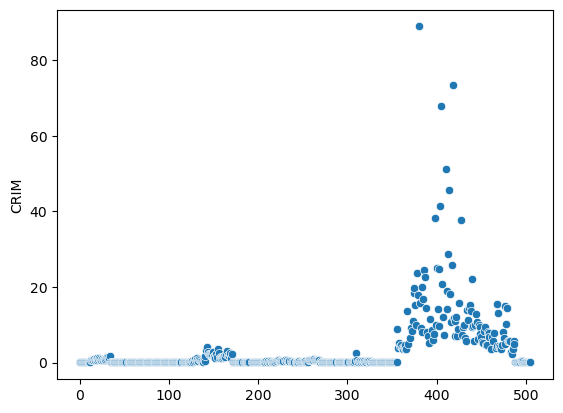

In [272]:
sns.scatterplot(data=df['CRIM'])
plt.show()

In [273]:
UB = df['CRIM'].mean() + 3 * df['CRIM'].std() 
LB = df['CRIM'].mean() - 3 * df['CRIM'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 29.77244952164821
lower bound: -22.54870157926138


In [274]:
df['CRIM'][(df['CRIM'] < LB) | (df['CRIM'] > UB)]

380    88.9762
398    38.3518
404    41.5292
405    67.9208
410    51.1358
414    45.7461
418    73.5341
427    37.6619
Name: CRIM, dtype: float64

In [275]:
df['CRIM'][(df['CRIM'] < LB) | (df['CRIM'] > UB)] = np.median(df['CRIM'])

### ZN

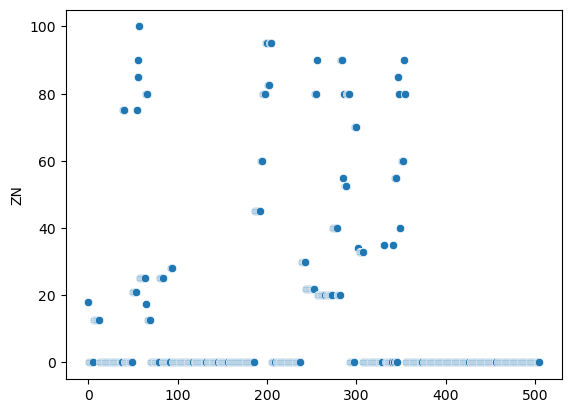

In [276]:
sns.scatterplot(data=df['ZN'])
plt.show()

In [277]:
UB = df['ZN'].mean() + 3 * df['ZN'].std() 
LB = df['ZN'].mean() - 3 * df['ZN'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 81.37856259517534
lower bound: -58.95469428241813


In [278]:
df['ZN'][(df['ZN'] < LB) | (df['ZN'] > UB)]

55      90.0
56      85.0
57     100.0
199     95.0
200     95.0
201     82.5
202     82.5
203     95.0
204     95.0
256     90.0
283     90.0
284     90.0
347     85.0
353     90.0
Name: ZN, dtype: float64

In [279]:
df['ZN'][(df['ZN'] < LB) | (df['ZN'] > UB)] = np.median(df['ZN'])

### RM

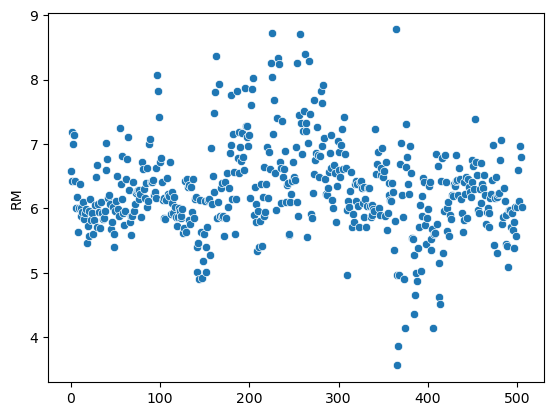

In [280]:
sns.scatterplot(data=df['RM'])
plt.show()

In [281]:
UB = df['RM'].mean() + 3 * df['RM'].std() 
LB = df['RM'].mean() - 3 * df['RM'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 8.392485817597757
lower bound: 4.176782957105816


In [282]:
df['RM'][(df['RM'] < LB) | (df['RM'] > UB)] 

225    8.725
257    8.704
262    8.398
364    8.780
365    3.561
367    3.863
374    4.138
406    4.138
Name: RM, dtype: float64

### DIS

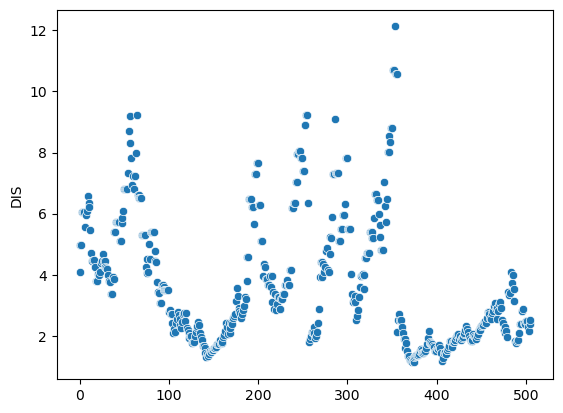

In [283]:
sns.scatterplot(data=df['DIS'])
plt.show()

In [284]:
UB = df['DIS'].mean() + 3 * df['DIS'].std() 
LB = df['DIS'].mean() - 3 * df['DIS'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 10.112173067629865
lower bound: -2.5220876921357975


In [285]:
df[(df['DIS'] < LB) | (df['DIS'] > UB)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,NaN,2.02,0.0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,NaN,1.91,0.0,0.413,5.936,NaN,10.5857,4,334,22.0,376.04,5.57,20.6


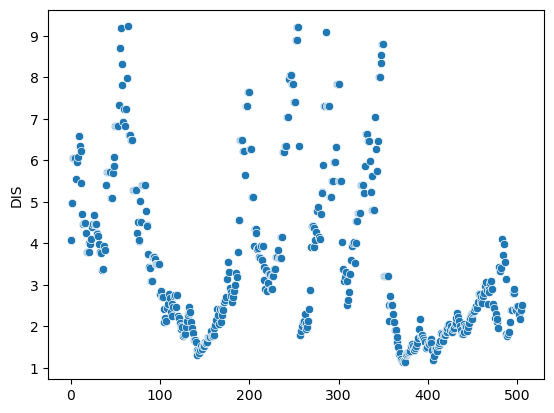

In [286]:
df['DIS'][(df['DIS'] < LB) | (df['DIS'] > UB)] = np.median(df['DIS'])
sns.scatterplot(data=df['DIS'])
plt.show()

### PTRATIO

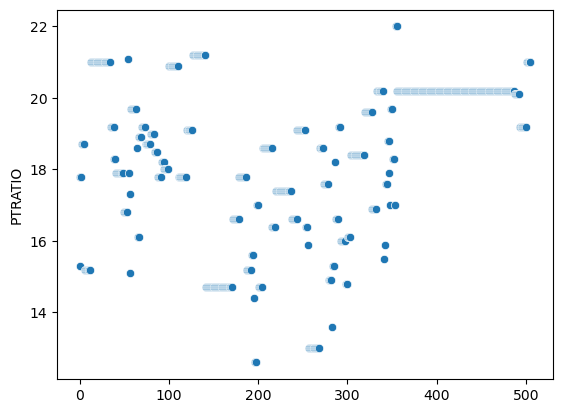

In [287]:
sns.scatterplot(data=df['PTRATIO'])
plt.show()

In [288]:
UB = df['PTRATIO'].mean() + 3 * df['PTRATIO'].std() 
LB = df['PTRATIO'].mean() - 3 * df['PTRATIO'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 24.950370167981305
lower bound: 11.960697025694628


In [289]:
df['PTRATIO'][(df['PTRATIO'] < LB) | (df['PTRATIO'] > UB)]

Series([], Name: PTRATIO, dtype: float64)

#### There is no outliers detected in PTRATIO column based on standard deviation technique.

### B

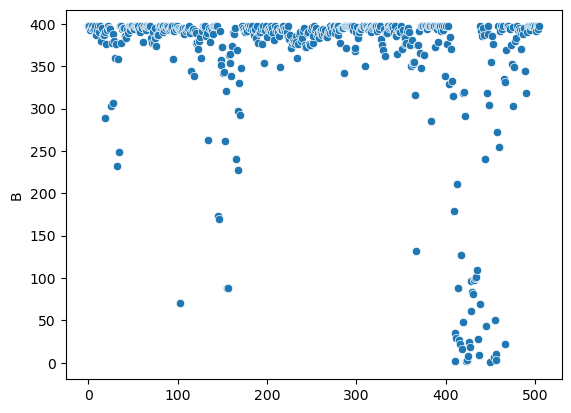

In [290]:
sns.scatterplot(data=df['B'])
plt.show()

In [291]:
UB = df['B'].mean() + 3 * df['B'].std() 
LB = df['B'].mean() - 3 * df['B'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 630.5586247730259
lower bound: 82.7894384680792


In [292]:
df['B'][(df['B'] < LB) | (df['B'] > UB)]

102    70.80
410     2.60
411    35.05
412    28.79
415    27.25
416    21.57
418    16.45
419    48.45
423     2.52
424     3.65
425     7.68
426    24.65
427    18.82
429    60.72
431    81.33
436    27.49
437     9.32
438    68.95
445    43.06
450     0.32
454     6.68
455    50.92
456    10.48
457     3.50
466    22.01
Name: B, dtype: float64

In [293]:
df['B'][(df['B'] < LB) | (df['B'] > UB)] = np.median(df['B'])

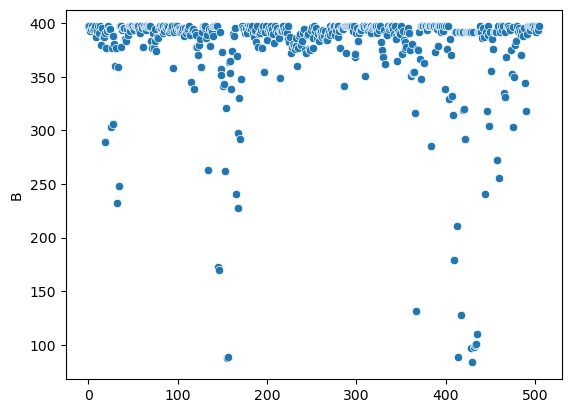

In [294]:
sns.scatterplot(data=df['B'])
plt.show()

### LSTAT

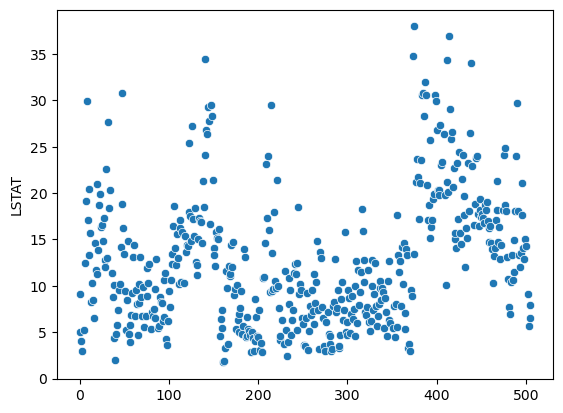

In [295]:
sns.scatterplot(data=df['LSTAT'])
plt.show()

In [296]:
UB = df['LSTAT'].mean() + 3 * df['LSTAT'].std() 
LB = df['LSTAT'].mean() - 3 * df['LSTAT'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 34.18304454618118
lower bound: -8.752180348650311


In [297]:
df['LSTAT'][(df['LSTAT'] < LB) | (df['LSTAT'] > UB)]

141    34.41
373    34.77
374    37.97
412    34.37
414    36.98
Name: LSTAT, dtype: float64

In [298]:
df['B'][(df['B'] < LB) | (df['B'] > UB)] = np.median(df['B'])

### MEDV

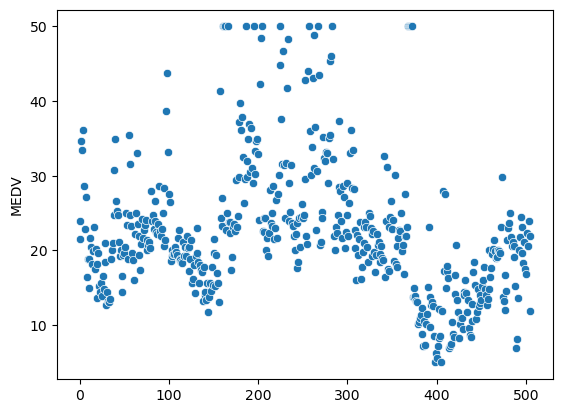

In [299]:
sns.scatterplot(data=df['MEDV'])
plt.show()

In [300]:
UB = df['MEDV'].mean() + 3 * df['MEDV'].std() 
LB = df['MEDV'].mean() - 3 * df['MEDV'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 50.12411858625016
lower bound: -5.0585059380287625


In [301]:
df['MEDV'][(df['MEDV'] < LB) | (df['MEDV'] > UB)]

Series([], Name: MEDV, dtype: float64)

#### In MEDV column there is no outliers detected based on standard deviation technique.

In [302]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,478.000000,472.000000,486.000000,506.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,486.000000,506.000000
mean,2.741663,8.864407,11.083992,0.067194,0.554695,6.284634,68.518519,3.718598,9.549407,408.237154,18.455534,3.914450e+02,12.715432,22.532806
std,5.092157,19.256720,6.835896,0.250605,0.115878,0.702617,27.999513,1.980432,8.707259,168.537116,2.164946,4.608873e-12,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,3.914450e+02,1.730000,5.000000
25%,0.079870,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,3.914450e+02,7.125000,17.025000
50%,0.243125,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.203325,5.000000,330.000000,19.050000,3.914450e+02,11.430000,21.200000
75%,2.768298,0.000000,18.100000,0.000000,0.624000,6.623500,93.975000,5.112625,24.000000,666.000000,20.200000,3.914450e+02,16.955000,25.000000
max,28.655800,80.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,22.000000,3.914450e+02,37.970000,50.000000


In [303]:
df.CHAS = df.CHAS.astype(str)
df.CHAS = df.CHAS.replace('0.0', '0')
df.CHAS = df.CHAS.replace('1.0', '1')

df.CHAS = df.CHAS.replace('nan', np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     478 non-null    float64
 1   ZN       472 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


In [304]:
df.to_csv('hd2_outlier_std.csv', index=False)